In [1058]:
import pandas as pd
import getpass
import sqlalchemy as sa
import numpy as np
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Importing Dataset.

In [1059]:
hp_df_org = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/Houseprices/Data/house_price_df.csv')
hp_df = hp_df_org
hp_df.info()
hp_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


## EDA

In [1060]:
# house_price_df.to_csv('C:/Users/Lenovo/Documents/GitHub/IronChristoph/MidTerm_Project/Data/house_price_df.csv')

In [1061]:
hp_df[['bedrooms', 'sqft_living',  'sqft_lot', 'yr_built', 'price']].describe()

,bedrooms,sqft_living,sqft_lot,yr_built,price
count,21597.000000,21597.000000,2.159700e+04,21597.000000,2.159700e+04
mean,3.373200,2080.321850,1.509941e+04,1970.999676,5.402966e+05
std,0.926299,918.106125,4.141264e+04,29.375234,3.673681e+05
min,1.000000,370.000000,5.200000e+02,1900.000000,7.800000e+04
25%,3.000000,1430.000000,5.040000e+03,1951.000000,3.220000e+05
50%,3.000000,1910.000000,7.618000e+03,1975.000000,4.500000e+05
75%,4.000000,2550.000000,1.068500e+04,1997.000000,6.450000e+05
max,33.000000,13540.000000,1.651359e+06,2015.000000,7.700000e+06


In [1062]:
avg_price_zipcode = pd.DataFrame(hp_df['price'].groupby(hp_df['zipcode']).mean())

avg_price_zipcode['avg_price_zip'] = avg_price_zipcode['price']
avg_price_zipcode.drop('price', axis=1, inplace=True)

In [1063]:
hp_df = pd.merge(hp_df, avg_price_zipcode, left_on = 'zipcode', right_on = 'zipcode')
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

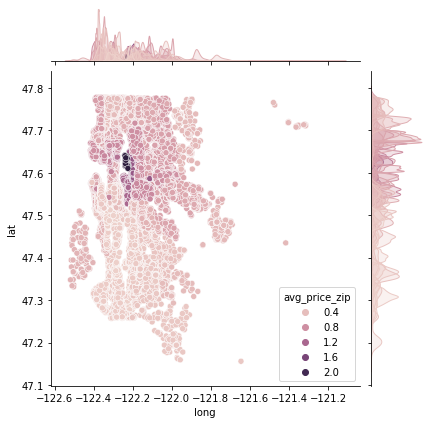

In [1064]:
sns.jointplot(data=hp_df, x='long', y='lat', hue='avg_price_zip')

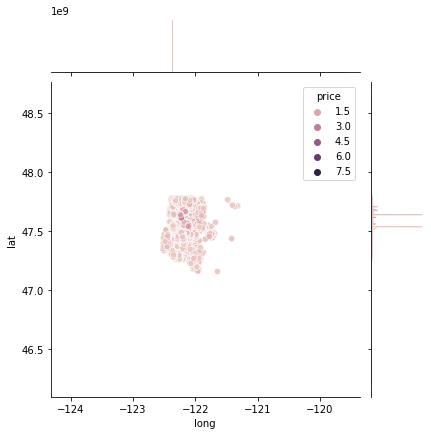

In [1065]:
sns.jointplot(data=hp_df, x='long', y='lat', hue='price')

In [687]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14538 entries, 366 to 5848
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sqft_living_transformed    14538 non-null  float64
 1   sqft_lot_transformed       14538 non-null  float64
 2   yr_built_transformed       14538 non-null  float64
 3   zipcode_transformed        14538 non-null  float64
 4   sqft_living15_transformed  14538 non-null  float64
 5   sqft_lot15_transformed     14538 non-null  float64
 6   bedrooms_3                 14538 non-null  uint8  
 7   bedrooms_4                 14538 non-null  uint8  
 8   bedrooms_6                 14538 non-null  uint8  
 9   bedrooms_7                 14538 non-null  uint8  
 10  bedrooms_33                14538 non-null  uint8  
 11  bathrooms_3.75             14538 non-null  uint8  
 12  bathrooms_4.25             14538 non-null  uint8  
 13  bathrooms_4.5              14538 non-null  ui

<AxesSubplot:xlabel='avg_price_zip', ylabel='Count'>

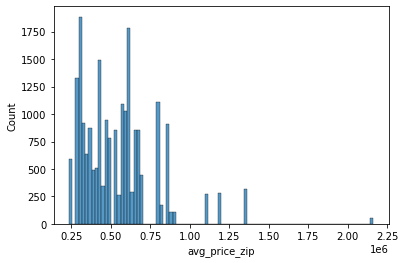

In [1056]:
sns.histplot(hp_df['avg_price_zip'])

## Define which columns are going to be numerical and which are going to be dummies

In [921]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [922]:
hp_df['date'].describe()

count          21597
unique           372
top       2014-06-23
freq             142
Name: date, dtype: object

In [923]:
hp_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [924]:
hp_df.columns

Index(['Unnamed: 0', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [925]:
col_drop = ['Unnamed: 0',\
            'id',\
            'date',\
           'long',\
           'lat']   
# 'Unnamed: 0' : id from import without information
# 'id': random or consequtive values without values
# 'date': probably the date the house was added to the database, no additional information for houseprice
# 'lang', 'lat': Geografical data, not usable in linear regression like this, can be converted to zones using knn. 
#    Task for later. But zip codes are enough, probably

In [926]:
# From the pairplot we can see which columns are categorical/dummies:
#  bderooms, bathrooms, floors, waterfront, view, condition, grade
ordinal_var = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
hp_df[ordinal_var] = hp_df[ordinal_var].astype('category')
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     21597 non-null  int64   
 1   id             21597 non-null  int64   
 2   date           21597 non-null  object  
 3   bedrooms       21597 non-null  category
 4   bathrooms      21597 non-null  category
 5   sqft_living    21597 non-null  int64   
 6   sqft_lot       21597 non-null  int64   
 7   floors         21597 non-null  category
 8   waterfront     21597 non-null  category
 9   view           21597 non-null  category
 10  condition      21597 non-null  category
 11  grade          21597 non-null  category
 12  sqft_above     21597 non-null  int64   
 13  sqft_basement  21597 non-null  int64   
 14  yr_built       21597 non-null  int64   
 15  yr_renovated   21597 non-null  int64   
 16  zipcode        21597 non-null  int64   
 17  lat            21597 non-null  

In [927]:
hp_df = hp_df.drop(col_drop, axis= 1)

In [928]:
hp_df.shape

(21597, 17)

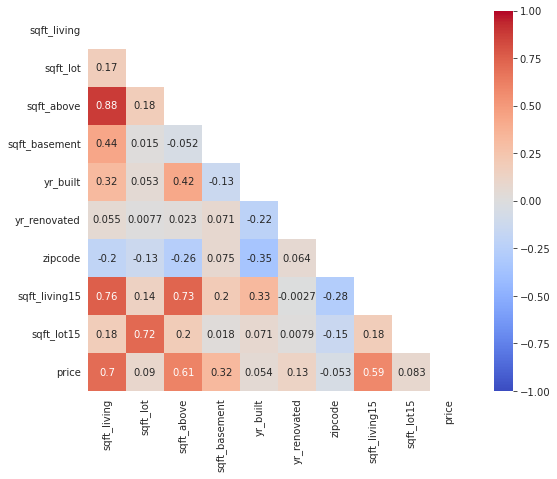

In [929]:
corr = hp_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

As expected there is a lot of correlation between sqf_above, sqf_living and other measures of size. 
- First: Drop sqf_above

In [930]:
corr_matrix=hp_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
corr_var = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
hp_df = hp_df.drop(corr_var, axis= 1)
hp_df.shape

(21597, 16)

The Dataframe is reduced from 21 columns to 16 columns.

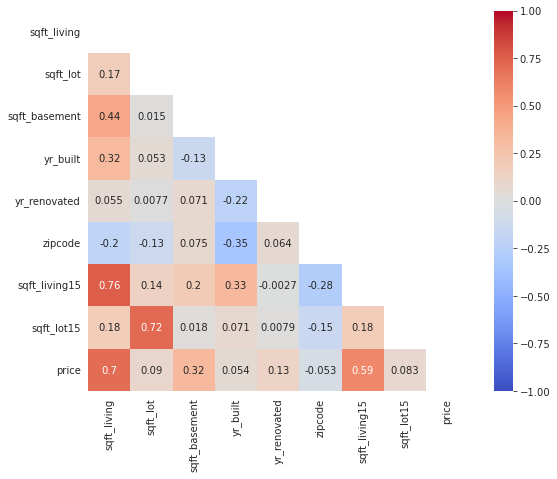

In [931]:
corr = hp_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

The new dataframe does not contain anymore variables with a higher correlation than 0.8, but the variable sqf_living15 should be examined later.

# Normalization

## Histograms
To check for the assumtion of normal distributions we check the histograms of the numerical variables

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

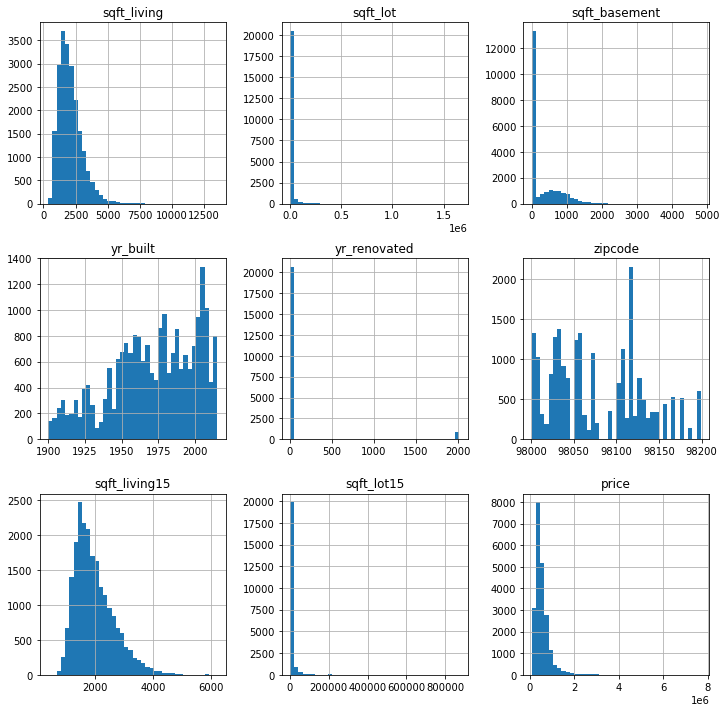

In [932]:
hp_df.select_dtypes('int').hist(figsize=(12,12), bins=40)


All numerical varibales are non-normaly distributed and need to be transformed. Additionally there are variables that need closer look:
    - sqft_basement: Many 0 values, maybe we should transform to dummy?
    - yr_renovated: 0 values mean not renovated and to not correspond to the scale of the acutal variable. How do deal with it not sure yet. 
    
    First try: drop sqft_basement and yr_renovated.

In [933]:
hp_df = hp_df.drop(['sqft_basement', 'yr_renovated'], axis=1)

## Transforming to normal distribution

In [934]:
# List of variables names to be transformed: 
to_trans =  {'sqft_living': 'qt',\
             'sqft_lot': 'qt',\
             'yr_built': 'qt',\
             'zipcode': 'qt', \
             'sqft_living15': 'qt',\
             'sqft_lot15': 'qt'}

,price,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,zipcode_transformed,sqft_living15_transformed,sqft_lot15_transformed
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,0.000009,-0.000043,-0.007133,-0.006377,0.000007,-0.000060
std,3.673681e+05,0.999686,0.999566,1.046026,1.283571,0.999868,1.000081
min,7.800000e+04,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,3.220000e+05,-0.667419,-0.676854,-0.689529,-0.653377,-0.665852,-0.673702
50%,4.500000e+05,-0.003764,0.000418,0.003764,-0.007527,0.001255,0.000000
75%,6.450000e+05,0.675277,0.674710,0.681594,0.710366,0.670557,0.674476
max,7.700000e+06,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


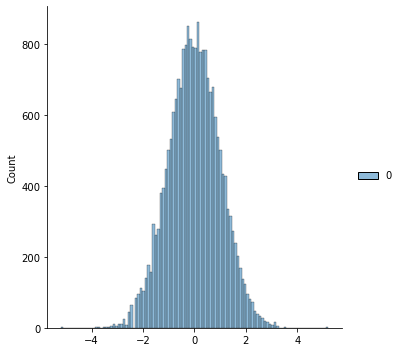

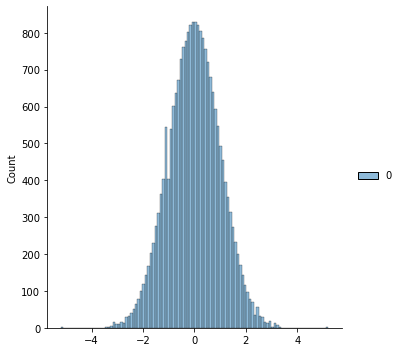

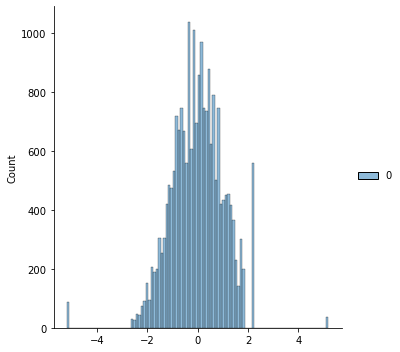

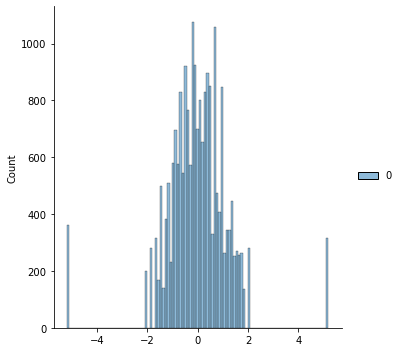

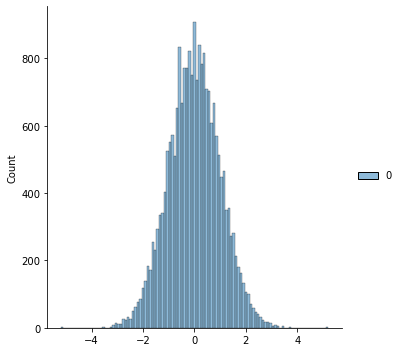

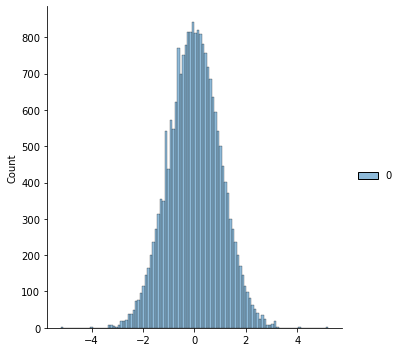

In [935]:

pt = PowerTransformer()
qt = QuantileTransformer(output_distribution="normal")

transformed_cols = []
for i in to_trans.keys():
    if list(to_trans.values())[0] == 'pt':
        transformed = pt.fit_transform(hp_df[i].to_numpy().reshape(-1,1))
    elif list(to_trans.values())[0] == 'qt':
        transformed = qt.fit_transform(hp_df[i].to_numpy().reshape(-1,1))
    else: 
        print('no transformer could be identified')
    sns.displot(transformed)
    col_name = i+'_transformed'
    hp_df[col_name] = transformed
    transformed_cols = transformed_cols + [col_name]
    hp_df = hp_df.drop(i, axis= 1)
    
    
hp_df.describe()

In [936]:
transformed_cols

['sqft_living_transformed',
 'sqft_lot_transformed',
 'yr_built_transformed',
 'zipcode_transformed',
 'sqft_living15_transformed',
 'sqft_lot15_transformed']

In [937]:
hp_df.describe()

,price,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,zipcode_transformed,sqft_living15_transformed,sqft_lot15_transformed
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,0.000009,-0.000043,-0.007133,-0.006377,0.000007,-0.000060
std,3.673681e+05,0.999686,0.999566,1.046026,1.283571,0.999868,1.000081
min,7.800000e+04,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,3.220000e+05,-0.667419,-0.676854,-0.689529,-0.653377,-0.665852,-0.673702
50%,4.500000e+05,-0.003764,0.000418,0.003764,-0.007527,0.001255,0.000000
75%,6.450000e+05,0.675277,0.674710,0.681594,0.710366,0.670557,0.674476
max,7.700000e+06,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [938]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   bedrooms                   21597 non-null  category
 1   bathrooms                  21597 non-null  category
 2   floors                     21597 non-null  category
 3   waterfront                 21597 non-null  category
 4   view                       21597 non-null  category
 5   condition                  21597 non-null  category
 6   grade                      21597 non-null  category
 7   price                      21597 non-null  int64   
 8   sqft_living_transformed    21597 non-null  float64 
 9   sqft_lot_transformed       21597 non-null  float64 
 10  yr_built_transformed       21597 non-null  float64 
 11  zipcode_transformed        21597 non-null  float64 
 12  sqft_living15_transformed  21597 non-null  float64 
 13  sqft_lot15_transformed     2159

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living_transformed'}>,
        <AxesSubplot:title={'center':'sqft_lot_transformed'}>],
       [<AxesSubplot:title={'center':'yr_built_transformed'}>,
        <AxesSubplot:title={'center':'zipcode_transformed'}>,
        <AxesSubplot:title={'center':'sqft_living15_transformed'}>],
       [<AxesSubplot:title={'center':'sqft_lot15_transformed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

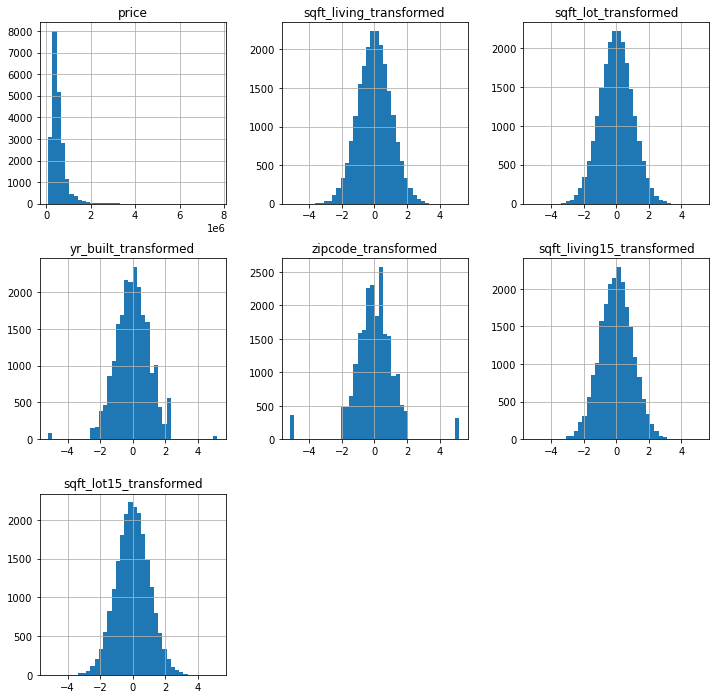

In [939]:
hp_df.select_dtypes(['int', 'float64']).hist(figsize=(12,12), bins=40)

## One-hot encode categorical variables

In [940]:
col_names_object = list(hp_df.select_dtypes(["object" and 'category']).columns)
col_names_object

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [941]:
cat_features =  pd.get_dummies(hp_df[col_names_object] , drop_first=True)

In [942]:
hp_df = hp_df.drop(col_names_object, axis = 1)

In [943]:
hp_df[cat_features.columns] = cat_features

In [1000]:
hp_df.columns

Index(['price', 'sqft_living_transformed', 'sqft_lot_transformed',
       'yr_built_transformed', 'zipcode_transformed',
       'sqft_living15_transformed', 'sqft_lot15_transformed', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',
       'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bedrooms_33',
       'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5',
       'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5',
       'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5',
       'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5',
       'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5',
       'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25', 'bathrooms_6.5',
       'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75', 'bathrooms_8.0',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_1', 'view_1

## Remove outliers

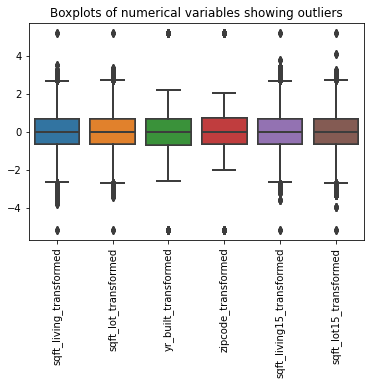

In [945]:
for i in transformed_cols:
    sns.boxplot(data=hp_df[transformed_cols]).set(title='Boxplots of numerical variables showing outliers')
    plt.xticks(rotation=90)

In [946]:
 len_before = hp_df.shape[0]

In [947]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-2*iqr
    fence_high = q3+2*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in transformed_cols: 
    hp_df = remove_outlier(hp_df, i )

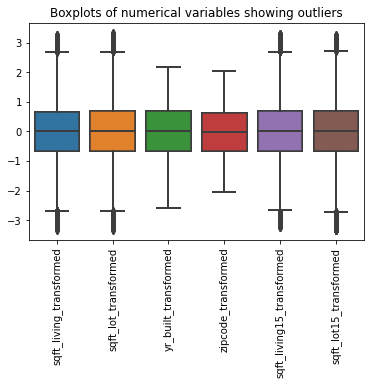

In [948]:
for i in transformed_cols:
    sns.boxplot(data=hp_df[transformed_cols]).set(title='Boxplots of numerical variables showing outliers')
    plt.xticks(rotation=90)

In [949]:
len_after = hp_df.shape[0]

In [950]:
print(f'Of the original dataset {round(len_after/len_before * 100, 2)}% of rows remain')

Of the original dataset 96.17% of rows remain


## 1st Model only using numerical variables

###  1) Split X-y

In [951]:
X=hp_df.drop('price', axis=1)
y=hp_df['price']


In [952]:
X=X.drop(cat_features.columns, axis=1)

In [953]:
X.columns

Index(['sqft_living_transformed', 'sqft_lot_transformed',
       'yr_built_transformed', 'zipcode_transformed',
       'sqft_living15_transformed', 'sqft_lot15_transformed'],
      dtype='object')

In [954]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

In [955]:
X_train

,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,zipcode_transformed,sqft_living15_transformed,sqft_lot15_transformed
366,1.055293,0.636387,0.875354,1.431971,0.415634,1.271089
17574,1.368450,-0.247645,1.097845,-0.295296,1.844811,-0.250368
2811,-2.575483,-0.888309,-2.241016,0.412900,-1.421556,-0.930036
18643,0.548158,0.602943,-0.329548,-0.583496,0.533636,0.589456
9813,-0.072829,-0.429351,-0.903301,1.756055,-1.239352,-0.278302
...,...,...,...,...,...,...
16925,-1.192071,1.004157,-0.758004,-1.210137,0.415634,0.618565
82,0.120731,-0.257495,-0.791884,0.710366,-0.194422,-0.257495
12565,2.067306,1.430926,0.711981,-1.575613,2.162646,1.573776
14676,1.817968,0.282727,1.199766,-1.135284,1.694923,0.344487


### Standardize

In [956]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train)

In [957]:
X_train.shape

(14538, 6)

In [958]:
X_test_scaled=std_scaler.transform(X_test)
X_test_scaled.shape

(6231, 6)

## Linear Regression

In [959]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     1810.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:57:18   Log-Likelihood:            -2.0274e+05
No. Observations:               14538   AIC:                         4.055e+05
Df Residuals:                   14531   BIC:                         4.056e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.399e+05   2286.432    236.144      0.0

In [960]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [961]:
model.coef_

array([199675.3064959 , -40226.33271277, -72630.73706728,  -3917.67655982,
        85545.17500833,  -5267.4058314 ])

In [962]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [963]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

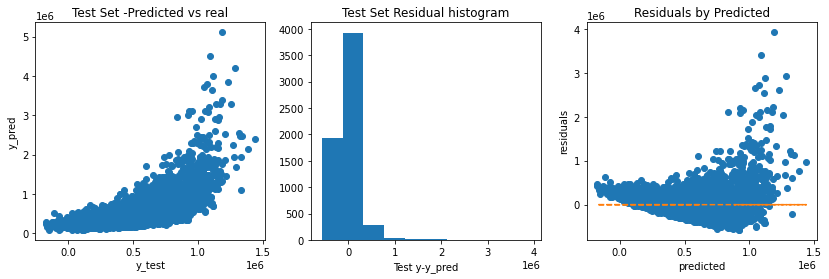

In [964]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [965]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  72912925167.62769
MAE test:  172170.97815457953
MSE train:  75964736714.36739
RMSE test:  414.93490833452364
R2_test:  0.4294883641759426
R2_train:  0.4277108043928304
MSE train - MSE test:  3051811546.7397003
R2_test/R2_train:  1.0041559852237907
Adj_R2: 0.42893838509256466


In [966]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [967]:
features_importances

,Attribute,Importance
0,sqft_living_transformed,199675.306496
4,sqft_living15_transformed,85545.175008
2,yr_built_transformed,72630.737067
1,sqft_lot_transformed,40226.332713
5,sqft_lot15_transformed,5267.405831
3,zipcode_transformed,3917.676560


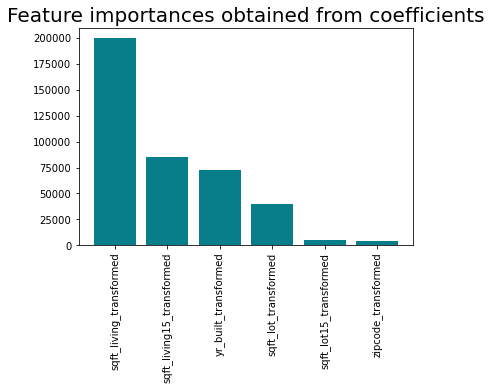

In [968]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## 2nd model including categorical variables

In [969]:
def Xy_split(df, output_col):
    """ Split the dataset into:
        X = dataframe of input variables
        y = predicted variable
    """
    X=df.drop(output_col, axis=1)
    y=df[output_col]
    print(X.columns)
    return X, y

X,y = Xy_split(hp_df, 'price') 

Index(['sqft_living_transformed', 'sqft_lot_transformed',
       'yr_built_transformed', 'zipcode_transformed',
       'sqft_living15_transformed', 'sqft_lot15_transformed', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',
       'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bedrooms_33',
       'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5',
       'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5',
       'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5',
       'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5',
       'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5',
       'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25', 'bathrooms_6.5',
       'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75', 'bathrooms_8.0',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_1', 'view_1', 'view_

In [970]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

In [971]:
std_scaler=StandardScaler().fit(X_train.select_dtypes(['int', 'float64']))   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train.select_dtypes(['int', 'float64']))

X_test_scaled=std_scaler.transform(X_test.select_dtypes(['int', 'float64']))
X_test_scaled.shape

(6231, 6)

In [972]:
X_train

,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,zipcode_transformed,sqft_living15_transformed,sqft_lot15_transformed,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
366,1.055293,0.636387,0.875354,1.431971,0.415634,1.271089,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
17574,1.368450,-0.247645,1.097845,-0.295296,1.844811,-0.250368,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2811,-2.575483,-0.888309,-2.241016,0.412900,-1.421556,-0.930036,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18643,0.548158,0.602943,-0.329548,-0.583496,0.533636,0.589456,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9813,-0.072829,-0.429351,-0.903301,1.756055,-1.239352,-0.278302,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,-1.192071,1.004157,-0.758004,-1.210137,0.415634,0.618565,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
82,0.120731,-0.257495,-0.791884,0.710366,-0.194422,-0.257495,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12565,2.067306,1.430926,0.711981,-1.575613,2.162646,1.573776,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14676,1.817968,0.282727,1.199766,-1.135284,1.694923,0.344487,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [973]:
X_train_scaled = np.concatenate((X_train_scaled, np.asarray(X_train[list(cat_features.columns)])), axis = 1) 

X_test_scaled = np.concatenate((X_test_scaled, np.asarray(X_test[list(cat_features.columns)])), axis =1)
print(X_train_scaled.shape, X_test_scaled.shape)

(14538, 69) (6231, 69)


In [974]:
print(y_train.shape, y_test.shape)

(14538,) (6231,)


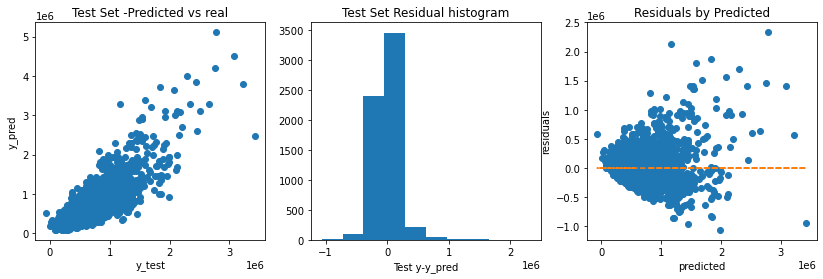

In [975]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train) 


y_pred=model.predict(X_test_scaled)   # model prediction
y_pred_train=model.predict(X_train_scaled)


result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})


# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [976]:
#sns.jointplot(y_pred, y_test)

In [977]:
#sns.jointplot(x=y_pred,y = (y_test - y_pred))

In [978]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  40389143095.84939
MAE test:  132794.0031615251
MSE train:  42291913516.071815
RMSE test:  364.4091150911638
R2_test:  0.6839726832496427
R2_train:  0.6813889415847456
MSE train - MSE test:  1902770420.2224274
R2_test/R2_train:  1.0037918749589447
Adj_R2: 0.6804333414454267


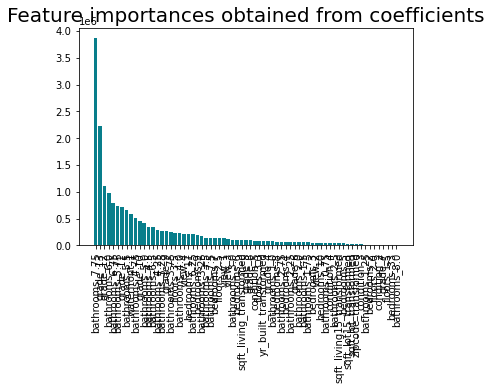

In [979]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Get P-values from model 

To filter the significant columns

In [980]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     461.9
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:57:23   Log-Likelihood:            -1.9849e+05
No. Observations:               14538   AIC:                         3.971e+05
Df Residuals:                   14470   BIC:                         3.976e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.789e+05   2.45e+05      1.548      0.1

In [981]:
sign_cols = model.pvalues[1:70]  # remove constant
len(sign_cols)

69

In [982]:
sign_cols[1]

4.457350246188992e-07

Pseudo-Code: for i in range(0, len(X.column)) drop X.columns[i] if sign_cols[i]> 0.05
        

In [981]:
sign_cols = pd.DataFrame([sign_cols])

In [983]:
hp_df.shape

(20769, 70)

In [984]:
X_col_list = X.columns
X_dropped_p = X
for i in range(0,len(X.columns)):
    if sign_cols[i]>0.05:
        X_dropped_p = X_dropped_p.drop(X_col_list[i], axis=1)
        #print('Variables dropped: ', X.columns[i], sign_cols[i])

In [985]:
print(X.shape, X_dropped_p.shape)

(20769, 69) (20769, 34)


From 69 initial variables, 34 remain.

## 3d linear Model only including variabels that had a siginificant p-value in the 2s Model

In [986]:
X_train, X_test, y_train, y_test=train_test_split(X_dropped_p, y, test_size=.30,random_state=100)

In [987]:
X_train_num = X_train.select_dtypes(['float64'])
X_test_num = X_test.select_dtypes(['float64'])
X_train_cat = X_train.select_dtypes(['uint8'])
X_test_cat = X_test.select_dtypes(['uint8'])
print(X_train_num.shape, X_test_num.shape, X_train_cat.shape, X_test_cat.shape)

(14538, 6) (6231, 6) (14538, 28) (6231, 28)


In [687]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14538 entries, 366 to 5848
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sqft_living_transformed    14538 non-null  float64
 1   sqft_lot_transformed       14538 non-null  float64
 2   yr_built_transformed       14538 non-null  float64
 3   zipcode_transformed        14538 non-null  float64
 4   sqft_living15_transformed  14538 non-null  float64
 5   sqft_lot15_transformed     14538 non-null  float64
 6   bedrooms_3                 14538 non-null  uint8  
 7   bedrooms_4                 14538 non-null  uint8  
 8   bedrooms_6                 14538 non-null  uint8  
 9   bedrooms_7                 14538 non-null  uint8  
 10  bedrooms_33                14538 non-null  uint8  
 11  bathrooms_3.75             14538 non-null  uint8  
 12  bathrooms_4.25             14538 non-null  uint8  
 13  bathrooms_4.5              14538 non-null  ui

In [988]:
std_scaler=StandardScaler().fit(X_train_num)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train_num)

X_test_scaled=std_scaler.transform(X_test_num)
X_test_scaled.shape

(6231, 6)

In [989]:
X_train_scaled = np.concatenate((X_train_scaled, np.asarray(X_train_cat)), axis = 1) 

X_test_scaled = np.concatenate((X_test_scaled, np.asarray(X_test_cat)), axis =1)
print(X_train_scaled.shape, X_test_scaled.shape)

(14538, 34) (6231, 34)


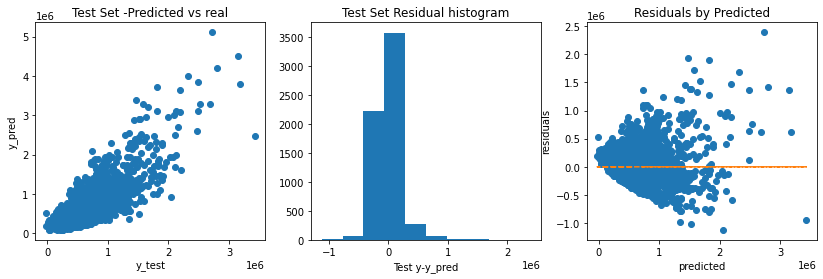

In [990]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train) 


y_pred=model.predict(X_test_scaled)   # model prediction
y_pred_train=model.predict(X_train_scaled)


result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})


# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [991]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  45174839070.68005
MAE test:  145433.89791207254
MSE train:  47782069756.65993
RMSE test:  381.3579655809913
R2_test:  0.6465267128283454
R2_train:  0.6400282098218248
MSE train - MSE test:  2607230685.9798737
R2_test/R2_train:  1.0101534634048859
Adj_R2: 0.6445870595417352


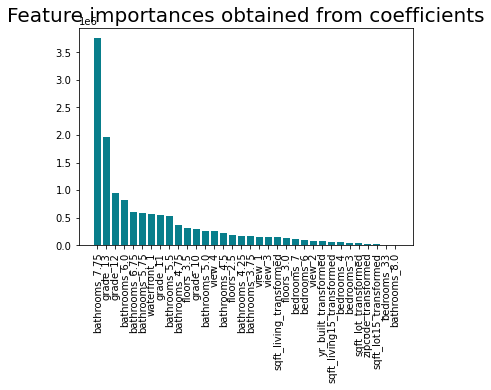

In [992]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [993]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     805.9
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:57:25   Log-Likelihood:            -1.9937e+05
No. Observations:               14538   AIC:                         3.988e+05
Df Residuals:                   14505   BIC:                         3.991e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.218e+05   4269.559    122.206      0.0

## KNN for zoning using lat and long variables to see if it as better predictor as Postcode

(Maybe compare to waterfront as well)


In [994]:
Pred = hp_df_org[['lat', 'long']]
y = hp_df_org['zipcode']

In [995]:
Pred

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
...,...,...
21592,47.6993,-122.346
21593,47.5107,-122.362
21594,47.5944,-122.299
21595,47.5345,-122.069


In [996]:
X_train, X_test, y_train, y_test = train_test_split(Pred, y, test_size=0.20)

In [1015]:
X_test[:,0]

array([-0.90023448, -0.97301963,  1.03758021, ...,  0.08344609,
        0.20091124, -1.63889571])

In [997]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[65  1  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 1  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  1 54  0]
 [ 0  0  0 ...  0  0 66]]
              precision    recall  f1-score   support

       98001       0.97      0.98      0.98        66
       98002       0.98      0.98      0.98        43
       98003       1.00      0.96      0.98        46
       98004       0.97      1.00      0.98        56
       98005       0.94      0.94      0.94        35
       98006       0.98      0.97      0.98       105
       98007       0.93      0.93      0.93        28
       98008       0.96      0.96      0.96        47
       98010       1.00      0.83      0.91        30
       98011       0.94      0.86      0.90        37
       98014       0.95      1.00      0.98        21
       98019       1.00      1.00      1.00        36
       98022       1.00      1.00      1.00        46
       98023       1.00      1.00      1.00       105
       98024       1.00      0.95

After testing n=3 as best model

In [1001]:
len(y_pred)

4320

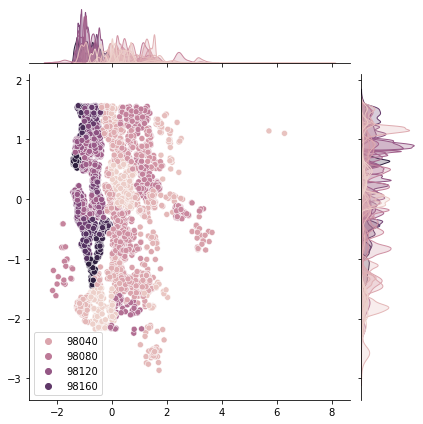

In [1017]:
sns.jointplot(x=X_test[:,1], y=X_test[:,0], hue=y_pred)

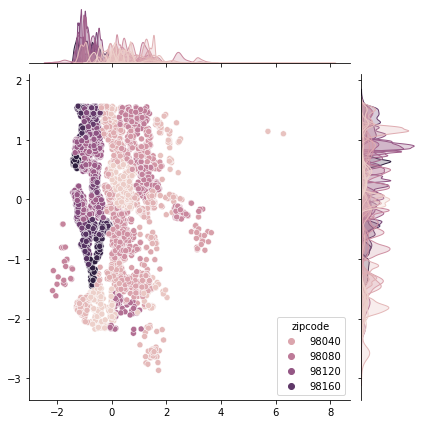

In [1018]:
sns.jointplot(x=X_test[:,1], y=X_test[:,0], hue=y_test)

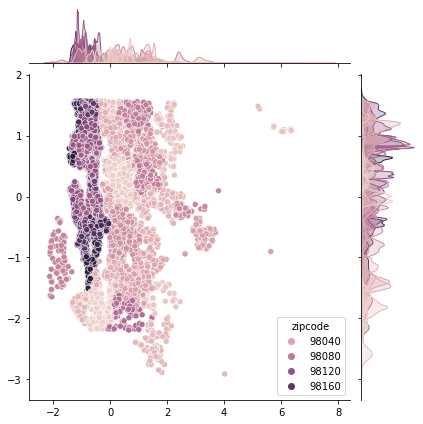

In [1019]:
sns.jointplot(x=X_train[:,1], y=X_train[:,0], hue=y_train)